# Exploratory Data Analysis in Python
Run the hidden code cell below to import the data used in this course.~

In [14]:
# Importing the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.interpolate
import statsmodels.formula.api as smf

# Importing the course datasets
brfss = pd.read_hdf('datasets/brfss.hdf5', 'brfss') # Behavioral Risk Factor Surveillance System (BRFSS) 
gss = pd.read_hdf('datasets/gss.hdf5', 'gss') # General Social Survey (GSS) 
nsfg = pd.read_hdf('datasets/nsfg.hdf5', 'nsfg') # National Survey of Family Growth (NSFG)

## Explore Datasets
Use the DataFrames imported in the first cell to explore the data and practice your skills!
- Begin by calculating the number of rows and columns and displaying the names of columns for each DataFrame. Change any column names for better readability.
- Experiment and compute a correlation matrix for variables in `nsfg`.
- Compute the simple linear regression of `WTKG3` (weight) and `HTM4` (height) in `brfss` (or any other variables you are interested in!). Then, compute the line of best fit and plot it. If the fit doesn't look good, try a non-linear model.

## Exploring the NSFG data

In [3]:
# Display the number of rows and columns
nsfg.shape

# Display the names of the columns
nsfg.columns

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head(5))

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


## Clean a variable

In [5]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace = True) #inplace=True, replace in the original dataframe

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


## Compute a variable

For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75.

In [6]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


## Make histograms

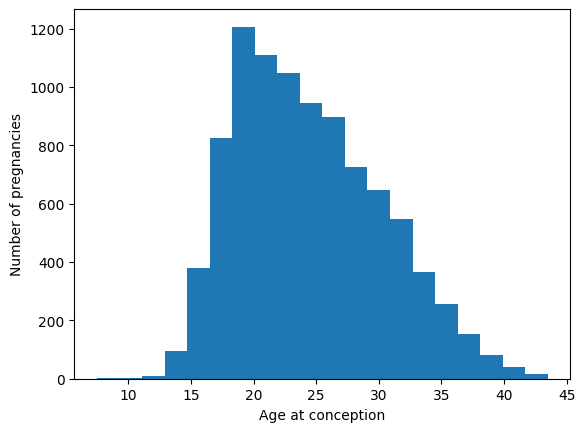

In [7]:
# Plot the histogram
plt.hist(agecon,bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

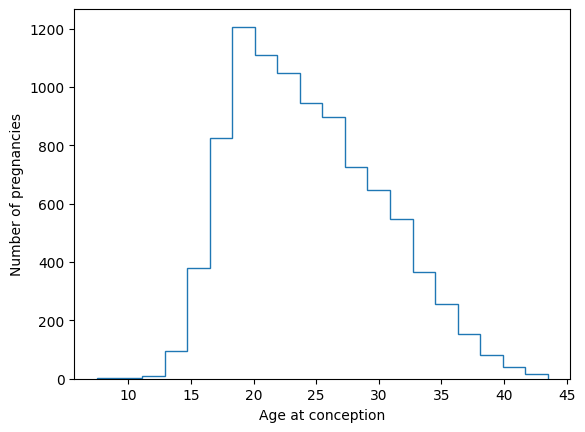

In [8]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

## Compute birth weight

In [18]:
# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

In [19]:
nsfg["birth_weight"] = birth_weight

In [20]:
# Create a Boolean Series for full-term babies
full_term = nsfg["prglngth"] >= 37

# Select the weights of full-term babies
full_term_weight = nsfg[full_term]["birth_weight"]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.372323879231473


## Filter

In [21]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg["nbrnaliv"] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


# Distributions

## Probability Mass Function

In [33]:
from empiricaldist import Pmf

#number of respondents in each year
pmf_year = Pmf.from_seq(gss["year"],normalize=False)
pmf_year

,probs
1972,1613
1973,1504
1974,1484
1975,1490
1976,1499
1977,1530
1978,1532
1980,1468
1982,1860
1983,1599


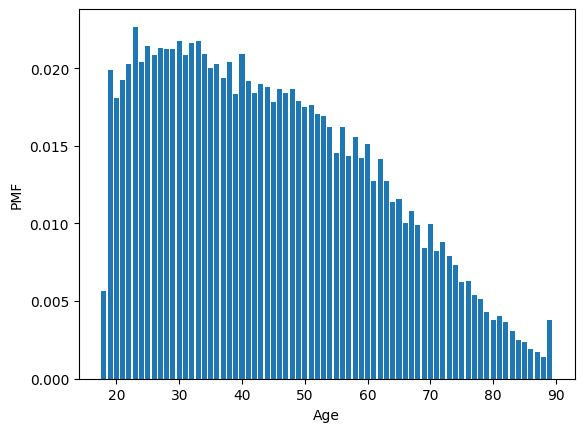

In [34]:
#plot the pmf
pmf_age = Pmf.from_seq(gss["age"],normalize=True)

pmf_age.bar() #bar plot

plt.xlabel("Age")
plt.ylabel("PMF")
plt.show()

**PMF V/S CDF**

If you draw a random element from a distribution:
- PMF is the probability that you get exactly x
- CDF is the probability that you get a value <= x
for a given value of x.

## Cummulative Distribution Functions

In [14]:
from empiricaldist import Cdf

cdf_age = Cdf.from_seq(gss["age"])
print(cdf_age)

18.0    0.005620
19.0    0.025497
20.0    0.043609
21.0    0.062828
22.0    0.083075
          ...   
85.0    0.991185
86.0    0.993112
87.0    0.994814
88.0    0.996227
89.0    1.000000
Name: , Length: 72, dtype: float64


In [16]:
#probability of respondents with age 30 or younger
print(cdf_age(30))

0.2539137136526389


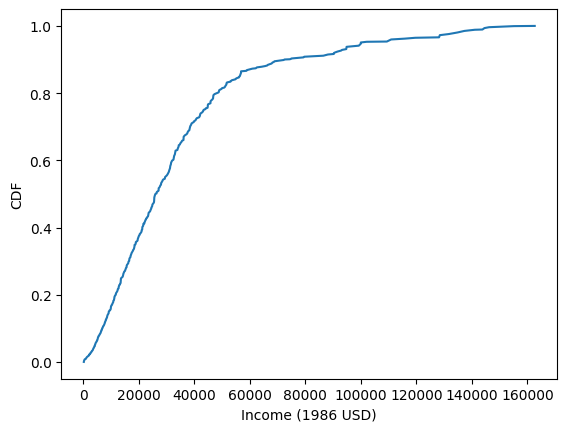

In [17]:
#plotting a cdf
# Select realinc
income = gss["realinc"]

# Make the CDF
cdf_income = Cdf.from_seq(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

## Comparing distributions
CDF is better than PMF for analysis as it shows smoother curves

In [19]:
#Plot income CDFs based on education qualification

educ = gss["educ"]
print(educ)

0        18.0
1        12.0
2        12.0
3        14.0
4        12.0
         ... 
62461    13.0
62462    16.0
62463    13.0
62464    12.0
62465    12.0
Name: educ, Length: 62466, dtype: float64


In [22]:
#boolean result on different educ qualification
high = (educ<=12) #high school
assc = ((educ>=14) & (educ<16)) #associate 
bach = (educ >= 16) #bachelors 

In [24]:
income = gss["realinc"]
print(income)

0        13537.0
1        18951.0
2        30458.0
3        37226.0
4        30458.0
          ...   
62461    74880.0
62462    65520.0
62463        NaN
62464     9945.0
62465    38610.0
Name: realinc, Length: 62466, dtype: float64


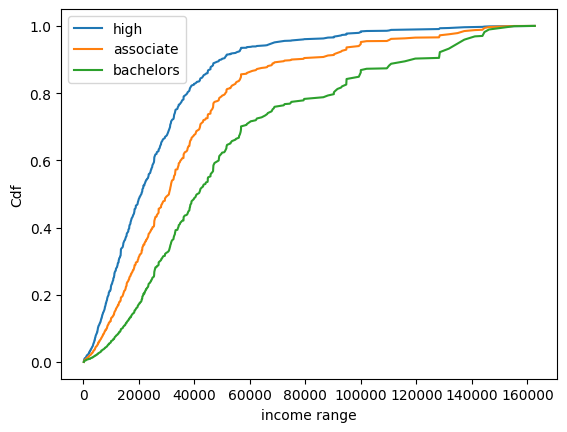

In [27]:
#plot for different educ qualification
Cdf.from_seq(income[high]).plot(label="high")
Cdf.from_seq(income[assc]).plot(label="associate")
Cdf.from_seq(income[bach]).plot(label="bachelors")

plt.legend()
plt.xlabel("income range")
plt.ylabel("Cdf")
plt.show()

## Modeling Distributions

- CDF: for smooth exploration of data
- PMF: for small number of unique values
- KDE: for large number of unique values

In [28]:
### Distribution of income

# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean,std)

4.371148677934171 0.4290082383271385


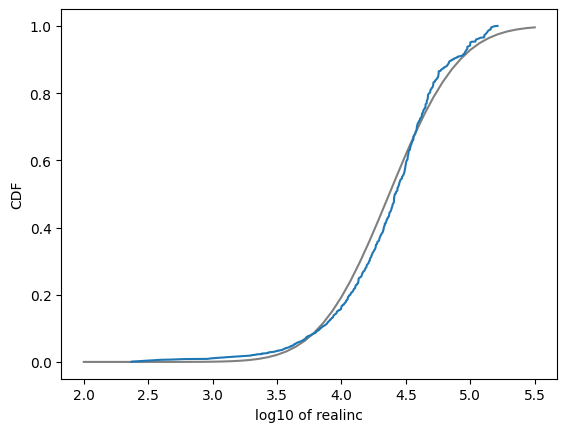

In [33]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
#evaluates the normal cumulative distribution function.
ys = dist.cdf(xs) 

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

In [36]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
"""a method for visualizing the distribution of observations in a dataset, analogous to a histogram"""
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

# Relationships

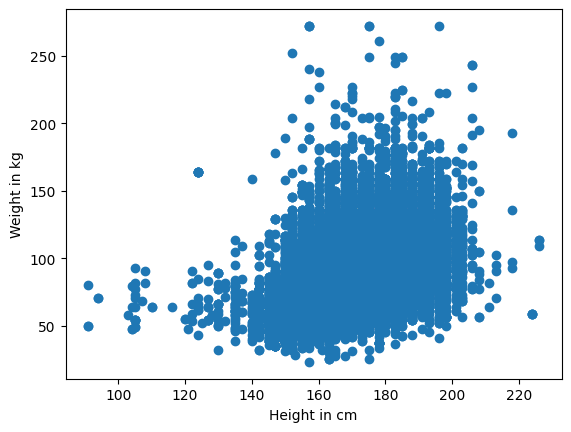

In [3]:
#relationship of "height" and "weight" in brfss dataset using scatter plot
height = brfss["HTM4"]
weight = brfss["WTKG3"]
plt.scatter(height,weight,marker="o")
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")
plt.show()

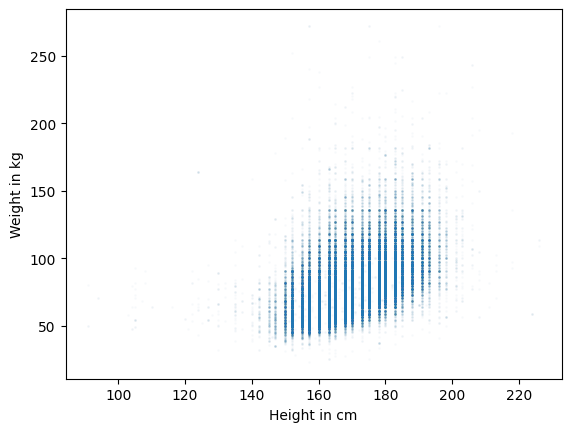

In [8]:
#since it is overplotted increasing "transperancy" and reducing "marker size"
#"alpha" for transperancy and "s" for manipulating marker size
plt.scatter(height,weight,marker="o",alpha=0.02,s=1) 
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")
plt.show()

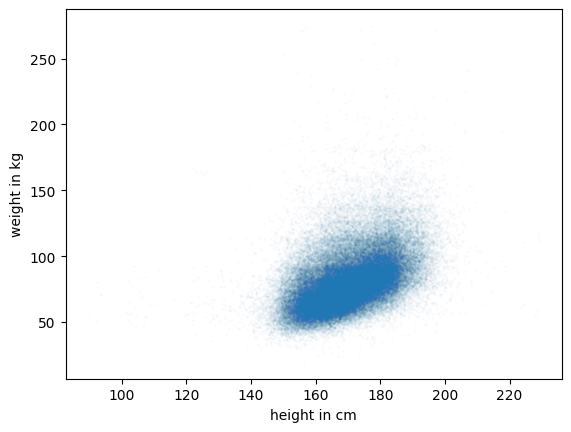

In [10]:
#jittering : filling in the values that got rounded off / adding noise 
height_jitter = height + np.random.normal(0,2,size=len(brfss))
weight_jitter = weight + np.random.normal(0,2,size=len(brfss))

plt.scatter(height_jitter,weight_jitter,marker="o",alpha=0.02,s=1) 
plt.xlabel("height in cm")
plt.ylabel("weight in kg")
plt.show()

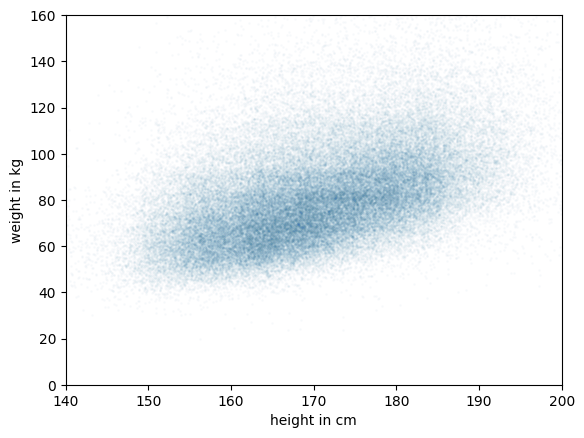

In [11]:
#zooming in where most of the datapoints are:
#pyplot function axis() sets the upper and lower bound of x-axis and y-axis to plot
plt.scatter(height_jitter,weight_jitter,marker="o",alpha=0.02,s=1) 
plt.axis([140,200,0,160]) #zoom
plt.xlabel("height in cm")
plt.ylabel("weight in kg")
plt.show()

## Visualizing relationships

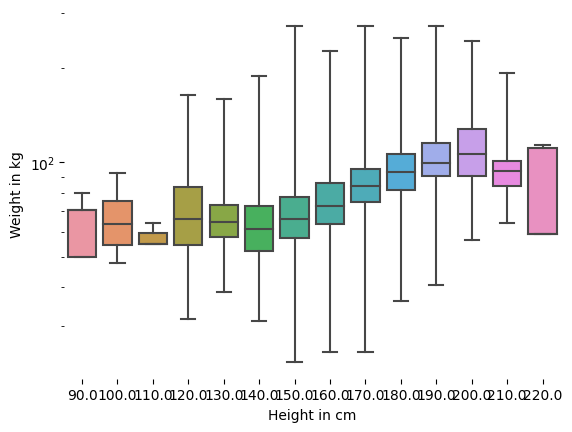

In [12]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
#distribution of weight ('WTKG3') in each height ('_HTMG10') 
sns.boxplot(x="_HTMG10",y="WTKG3",data=data,whis=10)

# Plot the y-axis on a log scale
plt.yscale("log")

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

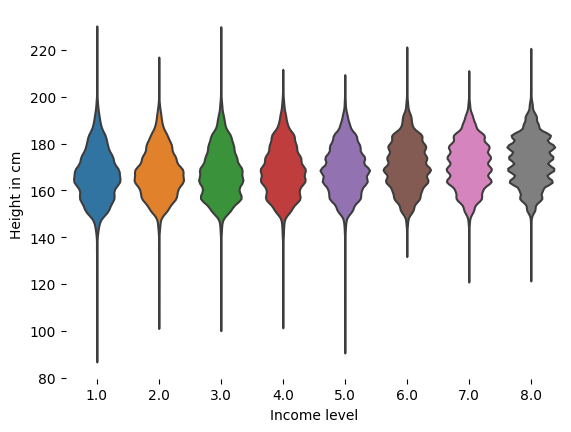

In [13]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
#the distribution of height ('HTM4') in each income ('INCOME2') group
sns.violinplot(x="INCOME2",y="HTM4",data=data,inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

## Correlation

In [14]:
# Select columns
columns = ["AGE","INCOME2","_VEGESU1"]
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


## Simple regression

In [16]:
from scipy.stats import linregress
subset = brfss.dropna(subset=["WTKG3","HTM4"])

xs = subset["HTM4"]
ys = subset["WTKG3"]
res = linregress(xs,ys)
print(res)

LinregressResult(slope=0.9192115381848305, intercept=-75.12704250330248, rvalue=0.4742030897902462, pvalue=0.0, stderr=0.005632863769802998, intercept_stderr=0.9608860265433182)


**Note** The slope is about 0.9 kg per cm, which means that we expect a person one centimeter taller to be almost a kilogram heavier.

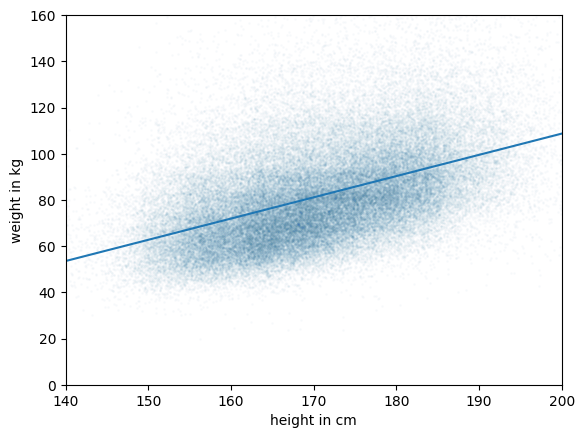

In [19]:
plt.scatter(height_jitter,weight_jitter,marker="o",alpha=0.02,s=1) #plot wt vs ht
plt.axis([140,200,0,160]) #zoom
plt.xlabel("height in cm")
plt.ylabel("weight in kg")

#adding linear line fit to plot
fx = np.array([xs.min(),xs.max()]) #array of min and max of independent variable
fy = res.intercept + res.slope * fx #fx multiplying with slope, then adding with intercept
plt.plot(fx,fy,"-")
plt.show()

**Note** It only measures the strength of linear relationship (Major drawback)

# Multivariate Thinking

## Multiple regression

In [3]:
import statsmodels.formula.api as smf

#regress income as a function of vegetables consumption i.e we trying to predict income based on given value of vegetables consumption
results = smf.ols("INCOME2 ~ _VEGESU1",data=brfss).fit() 
results.params #params contains the estimated slope and intercept

Intercept    5.450700
_VEGESU1     0.204935
dtype: float64

## Multiple regression in gss data

In [8]:
#predict income based on education qualification in gss data
results = smf.ols("realinc ~ educ",data=gss).fit()
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

**The output means:** The estimated slope of 3586 means thats each additional year of education is associated with an increase of almost $3600 of income.

In [10]:
#Adding age
#predicting income based on educ and age 
results = smf.ols("realinc ~ educ + age",data=gss).fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

**The slope of age means:** The increase in age increased income by almost $80 which is suprisingly small and this is because the relationship between income and age is non-linear.

So to **describe non-linear relationship** is to add new variable that is a non-linear combination of other variables.

In [19]:
#Adding quadratic
gss["age2"] = gss["age"] **2 

#multiple regression
results = smf.ols("realinc ~ educ + age + age2",data=gss).fit()
results.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

**The slope of age means:** The increase in age increased income by almost $1700 which is substantial.

## Visualizing regression results

In [20]:
#modeling age and income
gss["educ2"] = gss["educ"] **2

#multiple regression model
model = smf.ols("realinc ~ educ+educ2+age+age2",data=gss)
results = model.fit()
results.params

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64

In [7]:
#generating predictions : the results obj. has predict() method to generate predictions
df = pd.DataFrame()
df["age"] = np.linspace(18,85)
df["age2"] = df["age"]**2

df["educ"] = 12
df["educ2"] = df["educ"]**2

#the result from predict() is a series with one prediction for each row
pred12 = results.predict(df) 

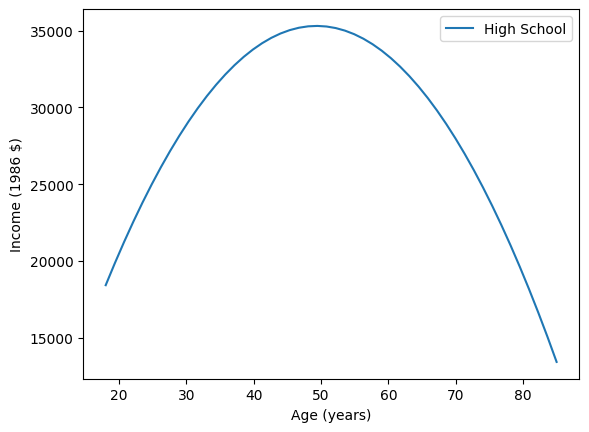

In [8]:
#plotting predictions
plt.plot(df["age"],pred12,label="High School")

plt.legend()
plt.xlabel("Age (years)")
plt.ylabel("Income (1986 $)")
plt.show()

## Logistic regression

In [9]:
#including categorical variable in regression
formula = "realinc ~ educ + educ2 + age + age2 + C(sex)" #C represents that sex is categorical
results = smf.ols(formula,data=gss).fit()
results.params

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

**Notes:** The regression treats the value sex=1, which is male, as the default, and reports the difference associated with the value sex=2, which is female. So this result indicates **the income for women is about $4100 less than that for men,** after controlling age and educ.

### Gunlaw Logistic regression

In [15]:
gss["gunlaw"].value_counts() #1--yes 2--no

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

In [16]:
gss["gunlaw"].replace([2],[0],inplace=True) #replacing such that 1--yes 0--no
gss["gunlaw"].value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

In [21]:
#logistic regression
formula = "gunlaw ~ educ + educ2 + age + age2 + C(sex)"
results = smf.logit(formula,data = gss).fit() #logit() method for logistic regression
results.params

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
educ          -0.124373
educ2          0.006653
age           -0.018849
age2           0.000189
dtype: float64

**Note:** the params output indicated that positive values means more likely and negative values means not likely

In [22]:
#generating prediction
df = pd.DataFrame()
df["age"] = np.linspace(18,89)
df["educ"] = 12

df["age2"] = df["age"]**2
df["educ2"] = df["educ"]**2

In [23]:
#prediction for men
df["sex"]=1
pred1 = results.predict(df)

In [24]:
#prediction for women
df["sex"]=2
pred2 = results.predict(df)

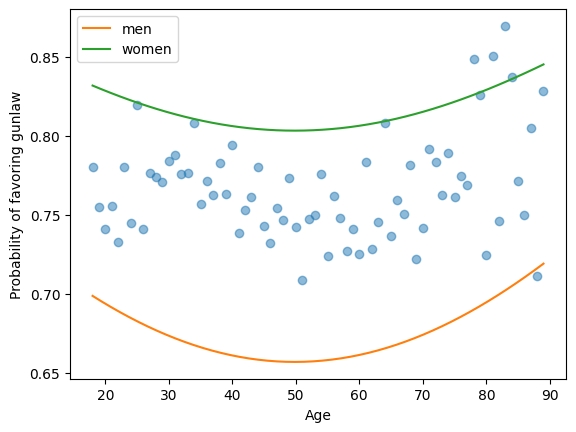

In [25]:
#visualizing data 
grouped = gss.groupby("age")
favor_by_age = grouped["gunlaw"].mean()
plt.plot(favor_by_age,"o",alpha=0.5)

plt.plot(df["age"],pred1,label="men")
plt.plot(df["age"],pred2,label="women")

plt.legend()
plt.xlabel("Age")
plt.ylabel("Probability of favoring gunlaw")

plt.show()

## "Do you think the use of marijuana should be made legal or not?"

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


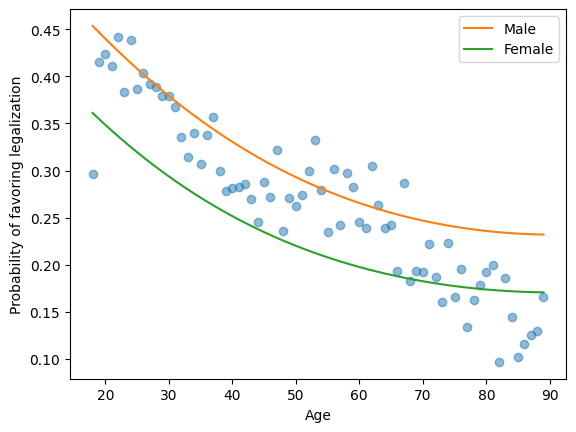

In [27]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

#compute the mean of 'grass' for each age group
plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped["grass"].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

#plot of prediction of model
plt.plot(df['age'], pred1, label='Male')
plt.plot(df["age"], pred2, label="Female")

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()